In [41]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt

In [53]:
ls ../data/

all_questions_classified_v2.zip  news_dialogue.zip
interview_dataset/               sample_set_questions_classified/
news_dialogue.json


In [69]:
! mv /Users/spangher/Downloads/vllm_all_questions_classified_v3.zip ../data/
! unzip ../data/vllm_all_questions_classified_v3.zip
! mv vllm_all_questions_classified_v3 ../data/
! mv ../data/vllm_all_questions_classified_v3/ ../data/sample_set_questions_classified_3

Archive:  ../data/vllm_all_questions_classified_v3.zip
   creating: vllm_all_questions_classified_v3/
  inflating: vllm_all_questions_classified_v3/interview_NPR-194.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-70.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-58.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-65.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-142.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-140.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-72.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-66.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-62.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-353.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-346.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-77.csv  
  inflating: vllm_all_questions_classified_v3/interview_NPR-63.cs

In [71]:
classified_files = glob.glob('../data/sample_set_questions_classified_3/*')

In [72]:
dfs =  list(map(pd.read_csv, classified_files))
for i, df in enumerate(dfs):
    df['id_col'] = f'interview_{i}'
full_df = pd.concat(dfs)

Text(0.5, 0, 'Num. Conversational Turns / Interview')

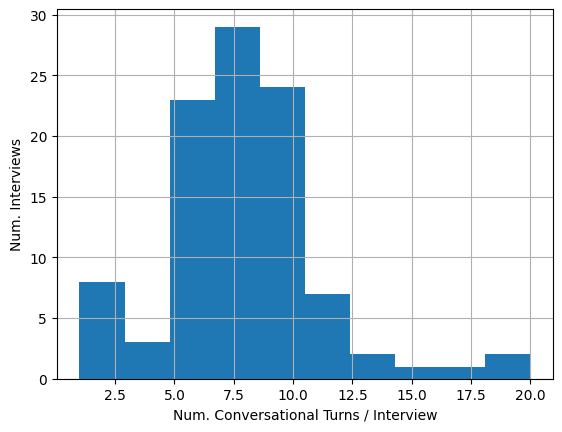

In [73]:
full_df['id_col'].value_counts().hist()
plt.ylabel('Num. Interviews')
plt.xlabel('Num. Conversational Turns / Interview')

In [89]:
full_df[['Question (Interviewer)', 'Question type']].iloc[14].to_dict()

{'Question (Interviewer)': "There have been reports of similar packages, like the ones that were delivered to the residents of Coudersport, these things showing up at people's houses across the country. Are you hearing from a lot of people outside Pennsylvania who found your Facebook group?",
 'Question type': ' Broadening Question '}

In [94]:
full_df['Question type'].str.split(', ').explode().str.split(' or ').explode().str.strip().value_counts()

Question type
Follow-Up Question                                                                                                                                 238
Starting/Ending Remarks                                                                                                                            214
Opinion/Speculation Question                                                                                                                        99
Verification Question                                                                                                                               96
Broadening Question                                                                                                                                 90
Acknowledgement Statement                                                                                                                           82
Challenge Question                                                              

In [32]:
mkdir cache

In [95]:
full_df.to_csv('cache/question_categories_to_annotate_2.csv')

In [67]:
{'Question (Interviewer)': 'Siegfried Hecker is a senior fellow emeritus at the Center for International Security and Cooperation at Stanford, speaking with us today on Skype. Thanks so much for your time.',
 'Question type': 'Establishing Empathy Question'}

{'Question (Interviewer)': 'Siegfried Hecker is a senior fellow emeritus at the Center for International Security and Cooperation at Stanford, speaking with us today on Skype. Thanks so much for your time.',
 'Question type': 'Establishing Empathy Question'}

In [38]:
full_df['id_col'].drop_duplicates().shape

(90,)

In [17]:
df['Question type'].value_counts()

Question type
Elaboration Question                184
Initial Inquiry Question            176
Establishing Empathy Question       130
Probing Question                     62
Opinion Seeking Question             52
Error                                39
Speculative Inquiry Question         30
Clarification Question               26
Confirmation Question                17
Rephrasing Question                  15
Topic Transition Question            13
Contradiction Challenge Question     11
Critical Inquiry Question             8
Fact-Checking Question                8
Scope Expansion Question              5
Name: count, dtype: int64

In [40]:
full_df.loc[lambda df: df['Question type'] == 'Fact-Checking Question']['Question (Interviewer)'].iloc[0]

"First off, the Obama administration hasn't even said for sure that Russia is actually behind these hacks. Are you so sure?"